In [27]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('National_USFS_Fire_Occurrence_Point.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_16964\1710992729.py:1: DtypeWarning: Columns (5,11,12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('National_USFS_Fire_Occurrence_Point.csv')


In [6]:
df.head()

,X,Y,OBJECTID,GLOBALID,FIREOCCURID,CN,REVDATE,FIRENAME,COMPLEXNAME,FIREYEAR,...,LATDD83,LONGDD83,FIRETYPECATEGORY,POINTTYPE,PERIMEXISTS,FIRERPTQC,DBSOURCEID,DBSOURCEDATE,ACCURACY,SHAPE
0,-106.427778,39.846111,231055009,{540C6E70-51FD-4CCC-A1B3-8A6C914E34A3},2B1B9A1B-7828-4688-A14C-4BD7CEE62226,NaN,2023/03/29 11:10:56+00,Elliott Ridge,NaN,2016.0,...,39.84611,-106.42778,WF,General,N,Yes,215,2024/09/24 04:01:09+00,24000.0,NaN
1,-107.935556,39.372778,231055010,{ACE77CF8-1281-4A81-BE3D-4D55669CB134},A2454D64-EBB7-4895-81BC-9782B3D1391E,NaN,2023/03/29 11:10:59+00,Battlement Mesa Reservoir,NaN,2016.0,...,39.37278,-107.93556,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN
2,-106.723333,39.118333,231055011,{D8EA7329-A0D0-4B64-A6F2-7A7FD86A3505},NaN,NaN,2023/03/29 11:10:56+00,Difficult,NaN,1997.0,...,39.11833,-106.72333,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN
3,-106.590000,39.656667,231055012,{67A72390-0E2B-411E-9CDE-6657101645E4},NaN,NaN,2023/03/29 11:10:56+00,,NaN,1993.0,...,39.65667,-106.59000,WF,General,N,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN
4,-107.317311,40.019286,231055013,{DFFF8D93-DE89-451C-830C-1F65FD550B3D},558D5D61-AB04-4AC3-8143-2E0EBE7CB506,NaN,2024/03/27 14:21:08+00,Paradise,NaN,2020.0,...,40.01929,-107.31731,WF,General,Y,Yes,215,2024/09/24 04:01:15+00,24000.0,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582034 entries, 0 to 582033
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  582001 non-null  float64
 1   Y                  582001 non-null  float64
 2   OBJECTID           582034 non-null  int64  
 3   GLOBALID           543705 non-null  object 
 4   FIREOCCURID        82678 non-null   object 
 5   CN                 275760 non-null  object 
 6   REVDATE            578324 non-null  object 
 7   FIRENAME           554233 non-null  object 
 8   COMPLEXNAME        9900 non-null    object 
 9   FIREYEAR           580865 non-null  float64
 10  UNIQFIREID         378555 non-null  object 
 11  SOFIRENUM          454460 non-null  object 
 12  LOCALFIRENUM       176556 non-null  object 
 13  SECURITYID         288180 non-null  object 
 14  DISCOVERYDATETIME  532073 non-null  object 
 15  SIZECLASS          580825 non-null  object 
 16  TO

In [9]:
df.shape

(582034, 35)

In [10]:
columns_to_drop = [
    'GLOBALID', 'FIREOCCURID', 'CN', 'COMPLEXNAME', 'LOCALFIRENUM',
    'SECURITYID', 'COMMENTS', 'FIREOUTDATETIME', 'UNITIDOWNER', 
    'UNITIDPROTECT', 'ACCURACY', 'SHAPE'
]
df_cleaned = df.drop(columns=columns_to_drop)

df_cleaned.to_csv("cleaned_fire_data.csv", index=False)




In [11]:
df_cleaned.shape


(582034, 23)

In [12]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582034 entries, 0 to 582033
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  582001 non-null  float64
 1   Y                  582001 non-null  float64
 2   OBJECTID           582034 non-null  int64  
 3   REVDATE            578324 non-null  object 
 4   FIRENAME           554233 non-null  object 
 5   FIREYEAR           580865 non-null  float64
 6   UNIQFIREID         378555 non-null  object 
 7   SOFIRENUM          454460 non-null  object 
 8   DISCOVERYDATETIME  532073 non-null  object 
 9   SIZECLASS          580825 non-null  object 
 10  TOTALACRES         578394 non-null  float64
 11  STATCAUSE          581269 non-null  object 
 12  DATASOURCE         577389 non-null  object 
 13  OWNERAGENCY        557495 non-null  object 
 14  PROTECTIONAGENCY   328465 non-null  object 
 15  LATDD83            581319 non-null  float64
 16  LO

In [13]:
date_columns = ['DISCOVERYDATETIME', 'REVDATE', 'DBSOURCEDATE']
year_column = 'FIREYEAR'

for col in date_columns:
    if col in df.columns:  # Ensure the column exists
        df_cleaned[col] = pd.to_datetime(df[col], errors='coerce')

if year_column in df.columns:
    df_cleaned[year_column] = df_cleaned[year_column].fillna(0).astype(int)

print(df_cleaned.dtypes)

X                                float64
Y                                float64
OBJECTID                           int64
REVDATE              datetime64[ns, UTC]
FIRENAME                          object
FIREYEAR                           int32
UNIQFIREID                        object
SOFIRENUM                         object
DISCOVERYDATETIME    datetime64[ns, UTC]
SIZECLASS                         object
TOTALACRES                       float64
STATCAUSE                         object
DATASOURCE                        object
OWNERAGENCY                       object
PROTECTIONAGENCY                  object
LATDD83                          float64
LONGDD83                         float64
FIRETYPECATEGORY                  object
POINTTYPE                         object
PERIMEXISTS                       object
FIRERPTQC                         object
DBSOURCEID                         int64
DBSOURCEDATE         datetime64[ns, UTC]
dtype: object


In [14]:
df_cleaned.describe()


,X,Y,OBJECTID,FIREYEAR,TOTALACRES,LATDD83,LONGDD83,DBSOURCEID
count,582001.000000,582001.000000,5.820340e+05,582034.000000,578394.000000,581319.000000,5.813190e+05,582034.000000
mean,-112.997574,39.297367,2.313469e+08,2005.827158,118.834622,42.854678,-1.097612e+02,159.522337
std,10.610189,4.913370,1.688898e+05,350.424240,3543.146957,1259.441709,3.534509e+03,227.862333
min,-150.433248,-89.998054,2.310550e+08,0.000000,0.000000,-117.233050,-1.038467e+06,1.000000
25%,-120.606689,35.070014,2.312005e+08,1989.000000,0.100000,35.051055,-1.206103e+02,5.000000
50%,-116.181944,38.558889,2.313464e+08,1999.000000,0.100000,38.557120,-1.161933e+02,6.000000
75%,-110.236100,43.673000,2.314933e+08,2008.000000,1.000000,43.670175,-1.098292e+02,306.000000
max,100.742879,90.000000,2.316393e+08,9999.000000,963309.000000,438897.000000,1.011213e+06,1005.000000


In [15]:
df_cleaned.nunique()

X                    339289
Y                    334071
OBJECTID             582034
REVDATE               12807
FIRENAME             186521
FIREYEAR                123
UNIQFIREID           170492
SOFIRENUM              2058
DISCOVERYDATETIME    153396
SIZECLASS                14
TOTALACRES             6736
STATCAUSE                47
DATASOURCE               32
OWNERAGENCY              40
PROTECTIONAGENCY         46
LATDD83              237993
LONGDD83             266714
FIRETYPECATEGORY         11
POINTTYPE                12
PERIMEXISTS               3
FIRERPTQC                10
DBSOURCEID               54
DBSOURCEDATE            569
dtype: int64

In [20]:
df_cleaned.isna().sum()

X                        33
Y                        33
OBJECTID                  0
REVDATE                4743
FIRENAME              27801
FIREYEAR                  0
UNIQFIREID           203479
SOFIRENUM            127574
DISCOVERYDATETIME     50493
SIZECLASS              1209
TOTALACRES             3640
STATCAUSE               765
DATASOURCE             4645
OWNERAGENCY           24539
PROTECTIONAGENCY     253569
LATDD83                 715
LONGDD83                715
FIRETYPECATEGORY        595
POINTTYPE              1126
PERIMEXISTS             306
FIRERPTQC             85225
DBSOURCEID                0
DBSOURCEDATE              0
dtype: int64

In [21]:
df_cleaned['X'] = df_cleaned['X'].fillna(df_cleaned['X'].mean())
df_cleaned['Y'] = df_cleaned['Y'].fillna(df_cleaned['Y'].mean())
df_cleaned['TOTALACRES'] = df_cleaned['TOTALACRES'].fillna(df_cleaned['TOTALACRES'].median())
df_cleaned['LATDD83'] = df_cleaned['LATDD83'].fillna(df_cleaned['LATDD83'].mean())
df_cleaned['LONGDD83'] = df_cleaned['LONGDD83'].fillna(df_cleaned['LONGDD83'].mean())

# Date columns: convert to datetime and handle missing values
date_columns = ['REVDATE', 'DISCOVERYDATETIME']
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')  # Convert to datetime format
    df_cleaned[col] = df_cleaned[col].fillna(method='ffill')           # Forward fill missing values

# Categorical columns: fill missing values with 'Unknown'
categorical_columns = [
    'FIRENAME', 'UNIQFIREID', 'SOFIRENUM', 'SIZECLASS', 'STATCAUSE',
    'DATASOURCE', 'OWNERAGENCY', 'PROTECTIONAGENCY', 'FIRETYPECATEGORY',
    'POINTTYPE', 'PERIMEXISTS', 'FIRERPTQC'
]
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# FIREYEAR column: replace missing values with mode and convert to integer
df_cleaned['FIREYEAR'] = df_cleaned['FIREYEAR'].fillna(df_cleaned['FIREYEAR'].mode()[0]).astype(int)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16964\974896527.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned[col] = df_cleaned[col].fillna(method='ffill')           # Forward fill missing values
C:\Users\DELL\AppData\Local\Temp\ipykernel_16964\974896527.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned[col] = df_cleaned[col].fillna(method='ffill')           # Forward fill missing values


In [23]:
df_cleaned['X'] = df_cleaned['X'].fillna(df_cleaned['X'].mean())
df_cleaned['Y'] = df_cleaned['Y'].fillna(df_cleaned['Y'].mean())
df_cleaned['TOTALACRES'] = df_cleaned['TOTALACRES'].fillna(df_cleaned['TOTALACRES'].median())
df_cleaned['LATDD83'] = df_cleaned['LATDD83'].fillna(df_cleaned['LATDD83'].mean())
df_cleaned['LONGDD83'] = df_cleaned['LONGDD83'].fillna(df_cleaned['LONGDD83'].mean())

# Date columns: convert to datetime and handle missing values
date_columns = ['REVDATE', 'DISCOVERYDATETIME']
for col in date_columns:
    df_cleaned[col] = pd.to_datetime(df_cleaned[col], errors='coerce')  # Convert to datetime format
    df_cleaned[col] = df_cleaned[col].ffill()                          # Forward fill missing values

# Categorical columns: fill missing values with 'Unknown'
categorical_columns = [
    'FIRENAME', 'UNIQFIREID', 'SOFIRENUM', 'SIZECLASS', 'STATCAUSE',
    'DATASOURCE', 'OWNERAGENCY', 'PROTECTIONAGENCY', 'FIRETYPECATEGORY',
    'POINTTYPE', 'PERIMEXISTS', 'FIRERPTQC'
]
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna('Unknown')

# FIREYEAR column: replace missing values with mode and convert to integer
df_cleaned['FIREYEAR'] = df_cleaned['FIREYEAR'].fillna(df_cleaned['FIREYEAR'].mode()[0]).astype(int)

df_cleaned.to_csv('cleaned_fire_data.csv', index=False)



In [24]:
df_cleaned.info


<bound method DataFrame.info of                  X          Y   OBJECTID                   REVDATE  \
0      -106.427778  39.846111  231055009 2023-03-29 11:10:56+00:00   
1      -107.935556  39.372778  231055010 2023-03-29 11:10:59+00:00   
2      -106.723333  39.118333  231055011 2023-03-29 11:10:56+00:00   
3      -106.590000  39.656667  231055012 2023-03-29 11:10:56+00:00   
4      -107.317311  40.019286  231055013 2024-03-27 14:21:08+00:00   
...            ...        ...        ...                       ...   
582029 -123.351389  40.951389  231639252 2019-01-02 00:00:00+00:00   
582030 -118.751667  34.648056  231639253 2019-01-02 00:00:00+00:00   
582031 -117.477222  34.313333  231639254 2019-01-02 00:00:00+00:00   
582032 -121.106944  38.978056  231639255 2019-01-02 00:00:00+00:00   
582033 -121.378833  39.876000  231639256 2021-12-20 09:22:24+00:00   

                         FIRENAME  FIREYEAR         UNIQFIREID SOFIRENUM  \
0                   Elliott Ridge      2016  2016-C

In [25]:
df_cleaned.isna().sum()

X                    0
Y                    0
OBJECTID             0
REVDATE              0
FIRENAME             0
FIREYEAR             0
UNIQFIREID           0
SOFIRENUM            0
DISCOVERYDATETIME    0
SIZECLASS            0
TOTALACRES           0
STATCAUSE            0
DATASOURCE           0
OWNERAGENCY          0
PROTECTIONAGENCY     0
LATDD83              0
LONGDD83             0
FIRETYPECATEGORY     0
POINTTYPE            0
PERIMEXISTS          0
FIRERPTQC            0
DBSOURCEID           0
DBSOURCEDATE         0
dtype: int64

In [6]:
import pandas as pd
df_cleaned= pd.read_csv('cleaned_fire_data.csv')

df_cleaned['FIREYEAR'] = df_cleaned['FIREYEAR'].apply(lambda x: x if x <= 2024 else None)

# Fill missing values in FIREYEAR using forward fill
df_cleaned['FIREYEAR'] = df_cleaned['FIREYEAR'].fillna(method='ffill').astype(int)

df_cleaned.to_csv('cleaned_fire_data.csv', index=False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7436\3467303231.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned= pd.read_csv('cleaned_fire_data.csv')
C:\Users\DELL\AppData\Local\Temp\ipykernel_7436\3467303231.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned['FIREYEAR'] = df_cleaned['FIREYEAR'].fillna(method='ffill').astype(int)


In [30]:
print(df_cleaned['FIREYEAR'].unique())

[2016 1997 1993 2020 1994 2003 2012 1996 1986 1987 2010 2000 2004 2009
 1989 1992 2008 2001 2006 2017 2013 2018 1934 2015 1959 2014 2022 2007
 1975 2005 1999 1940 1991 1998 2002 2011 1995 1988 1962 1990 2021 1974
 1976 1978 1983 1980 1985 2019 1982 1981 1971 1979 1977 1972 1960 1955
 2023 1950 1953 1958 1936 1968 1963 1970 1973 1984 1964 1961 1956 1952
 1966 1969 1941 1939 1957 1967 1945 1942 1924 1935 1949 1948 1947 1946
 1944 1943 1933 1925 1923 1922 1951 1954 1938 1937 1914 1913 1912 1911
 1932 1921 1919 1917 1918 1916 1915 1920 1910 1965 1931 1930 1929 1928
 1927 1926 1908    0 1001 1907    8 2024 1900 1902]


In [31]:
print(df_cleaned['FIREYEAR'].max())

2024


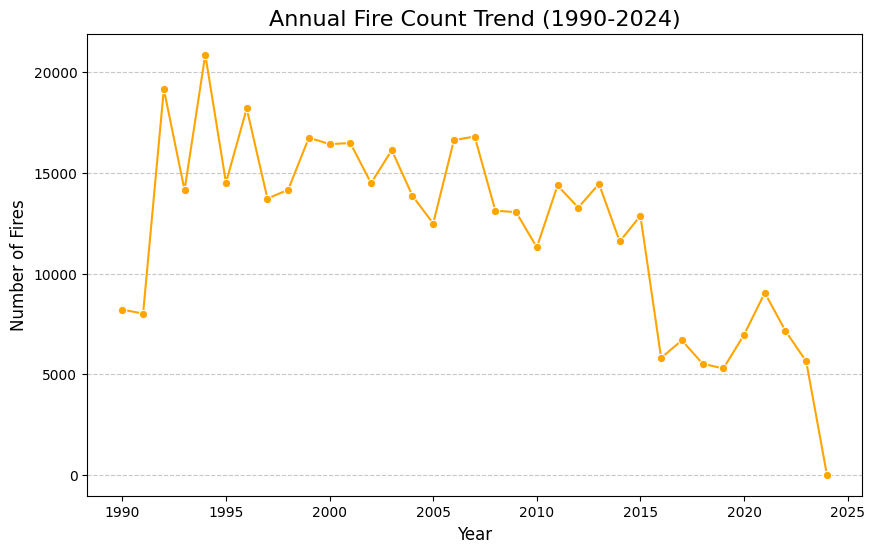

In [36]:
# Filter DataFrame for years between 1990 and 2024
df_filtered = df_cleaned[(df_cleaned['FIREYEAR'] >= 1990) & (df_cleaned['FIREYEAR'] <= 2024)]

# Group by year and count fires
fire_trend = df_filtered.groupby('FIREYEAR')['OBJECTID'].count()

# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=fire_trend, marker='o', color='orange')
plt.title('Annual Fire Count Trend (1990-2024)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
- This line chart shows count of fires by years

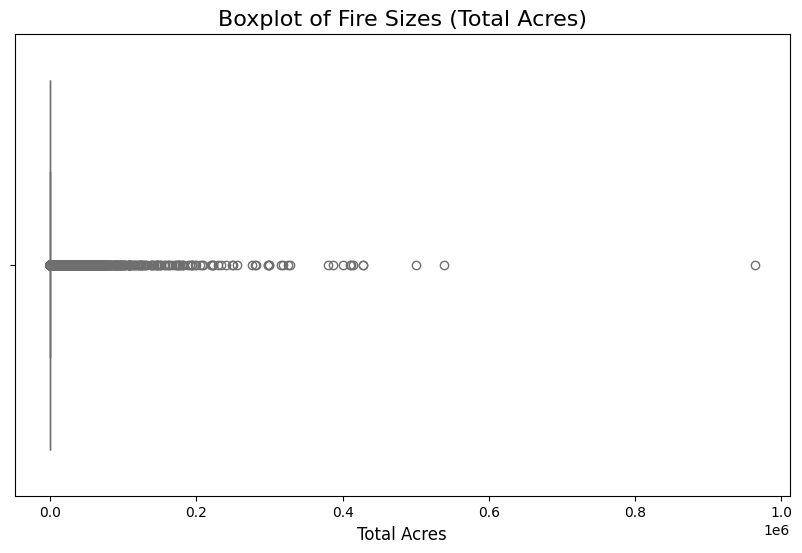

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned, x='TOTALACRES', color='skyblue')
plt.title('Boxplot of Fire Sizes (Total Acres)', fontsize=16)
plt.xlabel('Total Acres', fontsize=12)
plt.show()


In [ ]:
-This scatter plot shows fire size by area 

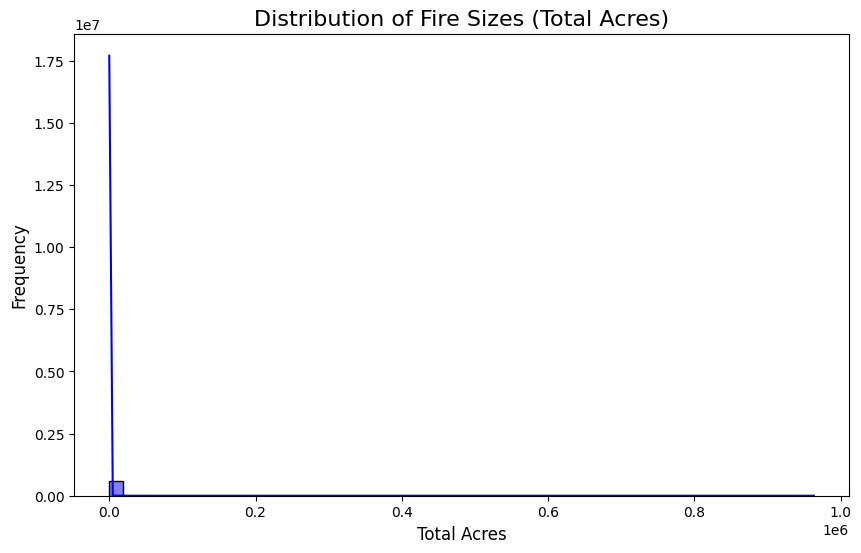

In [ ]:
-This chart shows frequency of fires by area 

C:\Users\DELL\AppData\Local\Temp\ipykernel_16964\3098766835.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_8_causes.index, y=top_8_causes.values, palette='viridis')


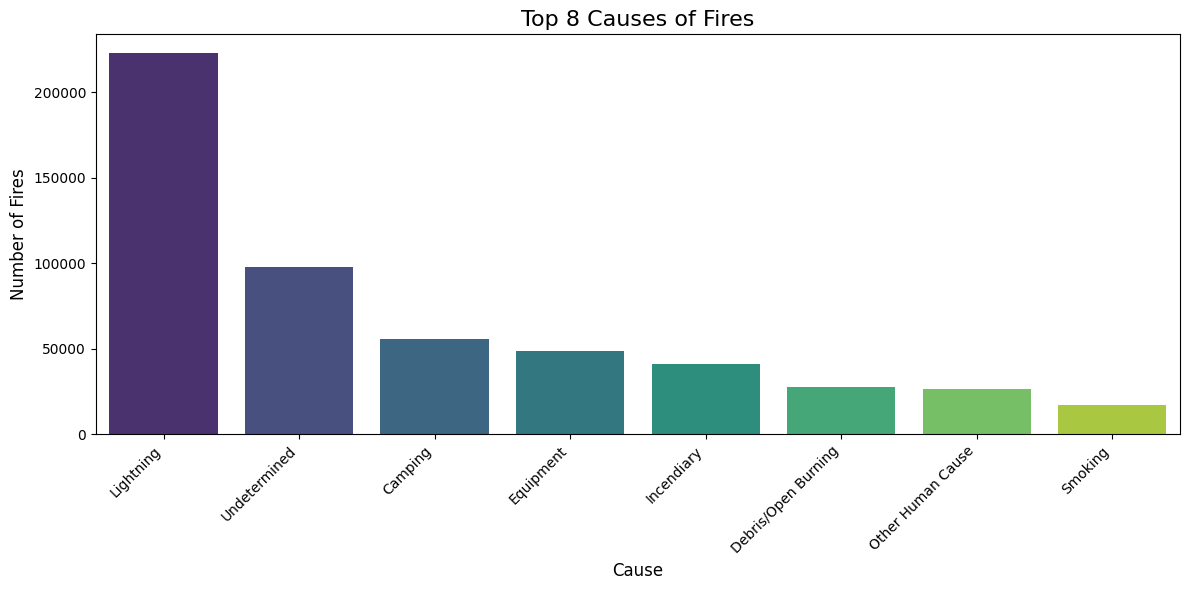

In [43]:
top_8_causes = cause_counts.head(8)

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=top_8_causes.index, y=top_8_causes.values, palette='viridis')
plt.title('Top 8 Causes of Fires', fontsize=16)
plt.xlabel('Cause', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels to prevent overlap
plt.tight_layout()  # Adjust layout to ensure everything fits
plt.show()

In [ ]:
- This bar chart shows top 8 causes of fires

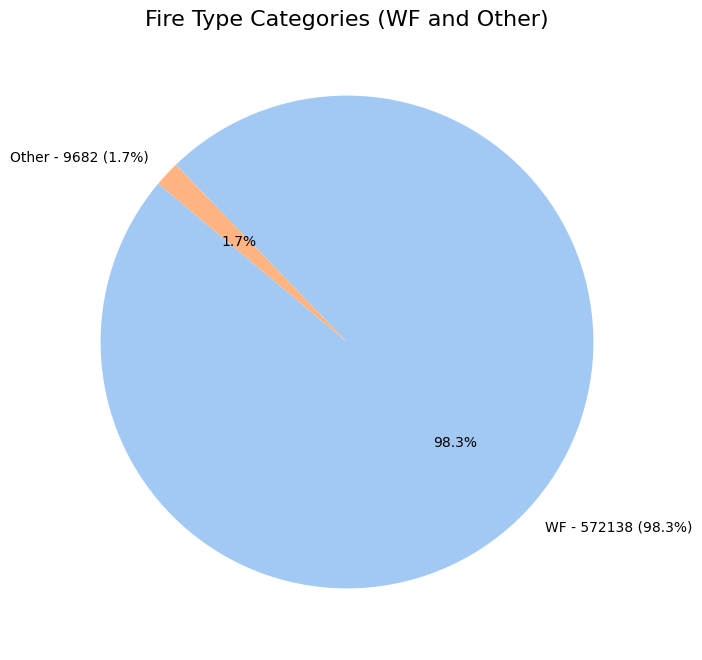

In [50]:

# Count FIRETYPECATEGORY values
firetype_counts = df_cleaned['FIRETYPECATEGORY'].value_counts()

# Group everything other than "WF" into "Other"
other_count = firetype_counts[firetype_counts.index != 'WF'].sum()
firetype_counts = firetype_counts[firetype_counts.index == 'WF']
firetype_counts['Other'] = other_count

# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(firetype_counts, labels=[f'{label} - {count} ({percentage:.1f}%)' for label, count, percentage in zip(firetype_counts.index, firetype_counts.values, firetype_counts.values / firetype_counts.sum() * 100)],
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))

# Title and display
plt.title('Fire Type Categories (WF and Other)', fontsize=16)
plt.show()


In [ ]:
- This Pie charts tells that 98% fires were caused by Wild Fires

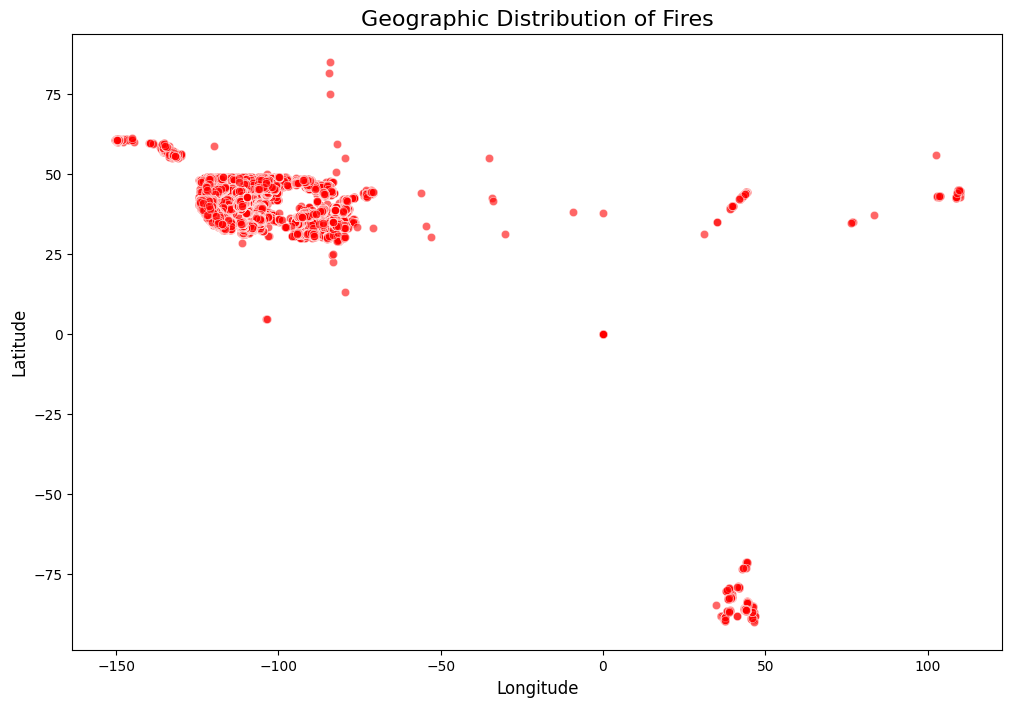

In [45]:
df_cleaned = df_cleaned[(df_cleaned['LATDD83'] >= -90) & (df_cleaned['LATDD83'] <= 90)]
df_cleaned = df_cleaned[(df_cleaned['LONGDD83'] >= -180) & (df_cleaned['LONGDD83'] <= 180)]

# Create the scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='LONGDD83', y='LATDD83', alpha=0.6, color='red')

# Title and labels
plt.title('Geographic Distribution of Fires', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [ ]:
- This Scatter chart shows longitude and latitude for geographic distribution of fires

C:\Users\DELL\AppData\Local\Temp\ipykernel_16964\2280169332.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='coolwarm')


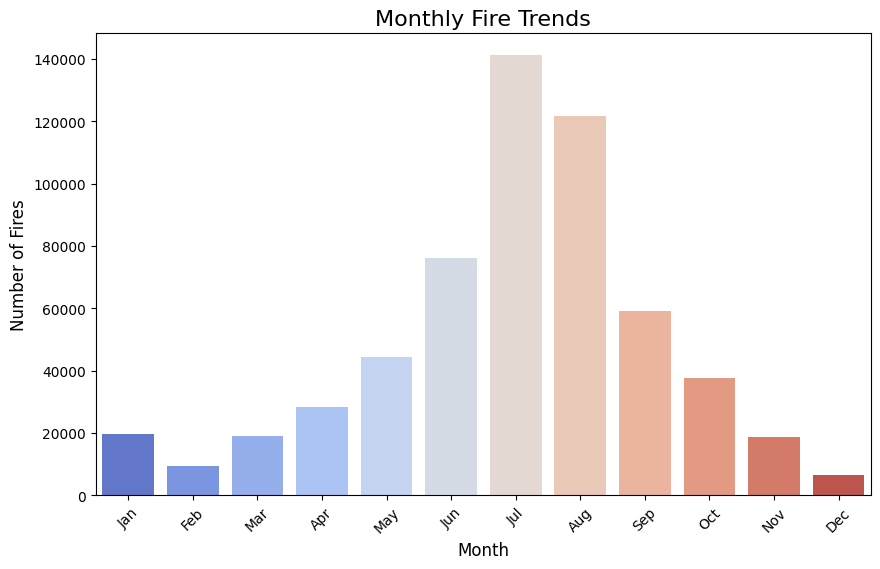

In [46]:
df_cleaned['MONTH'] = pd.to_datetime(df_cleaned['DISCOVERYDATETIME']).dt.month

# Count fires by month
monthly_trends = df_cleaned['MONTH'].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette='coolwarm')
plt.title('Monthly Fire Trends', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Fires', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


In [ ]:
- This chart shows frequency of fires by months.